https://mvlearn.github.io/auto_examples/embed/plot_kmcca_pgso_tutorial.html

In [ ]:
%matplotlib inline


# Partial Gram-Schmidt Orthogonalization (PGSO) for KMCCA

Kernel matrices grow exponentially with the size of the data. There are
immense storage and run-time constraints that arise when working with large
datasets. The partial Gram-Schmidt orthogonalization (PGSO) finds a low-rank
approximation of the Cholesky decomposition of the kernel matrix. This
reduces storage requirements from O(n^2) to O(nm), where n is the number of
subjects (rows) and m is the rank of the kernel matrix. This also reduces the
run-time from O(n^3) to O(nm^2).


In [ ]:
!pip install mvlearn

     |████████████████████████████████| 2.1 MB 4.1 MB/s 


In [ ]:
# Authors: Ronan Perry, Theodore Lee
# License: MIT

import timeit
import numpy as np
import matplotlib.pyplot as plt
from mvlearn.plotting.plot import crossviews_plot
from mvlearn.embed import KMCCA
import warnings
warnings.filterwarnings("ignore")


def make_data(N, seed=None):
    np.random.seed(seed)
    t = np.random.uniform(-np.pi, np.pi, N)
    e1 = np.random.normal(0, 0.1, (N, 2))
    e2 = np.random.normal(0, 0.1, (N, 2))

    X1 = np.zeros((N, 2))
    X1[:, 0] = t
    X1[:, 1] = np.sin(3*t)
    X1 += e1

    X2 = np.zeros((N, 2))
    X2[:, 0] = np.exp(t/4)*np.cos(2*t)
    X2[:, 1] = np.exp(t/4)*np.sin(2*t)
    X2 += e2

    return [X1, X2]

## Full Decomposition vs PGSO on Sample Data

PGSO is run on two views of data that each have two dimensions that are
sinuisoidally related. The data has 100 samples and thus the fully decomposed
kernel matrix would have dimensions (100, 100). PSGO finds an approximation
with lower rank at the given tolerance of 0.5 to the full kernel matrix.



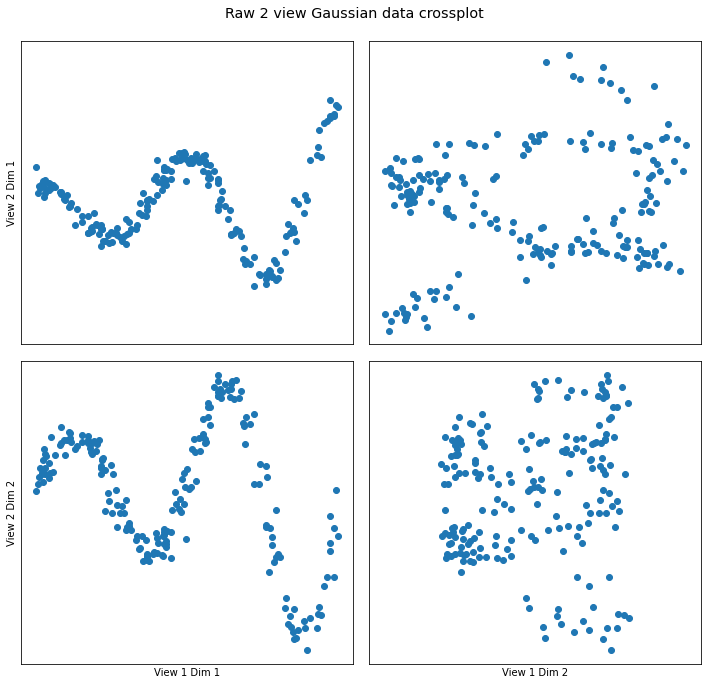

In [ ]:
Xs_train = make_data(100, seed=1)
Xs_test = make_data(200, seed=2)


crossviews_plot(Xs_test, ax_ticks=False, ax_labels=True, equal_axes=True,
                title='Raw 2 view Gaussian data crossplot')